# MLE challenge - Train model notebook

### Notebook 2

In this notebook, we train the model with a few features (for reasons of time and complexity in solving the challenge). It also shows how to persist the model in a file, load it into memory and then make a predict.



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score, 
    plot_confusion_matrix, precision_score, plot_roc_curve
)

from sklearn.ensemble import RandomForestClassifier

#### Read dataset

In [31]:
df = pd.read_csv('train_model.csv')

In [32]:
df.head()

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,status
0,5008806,59,3,0,NaN,1,0
1,5008806,59,3,1,107.076123,1,0
2,5008806,59,3,2,104.831726,1,0
3,5008806,59,3,3,121.470705,1,0
4,5008806,59,3,4,169.659088,1,0


In [33]:
df.dtypes

id                             int64
age                            int64
years_on_the_job               int64
nb_previous_loans              int64
avg_amount_loans_previous    float64
flag_own_car                   int64
status                         int64
dtype: object

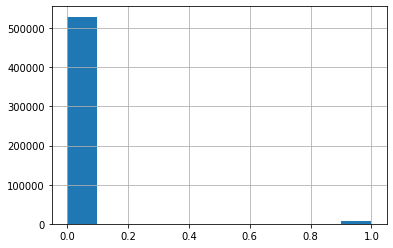

In [34]:
df.status.hist()

In [35]:
cust_df = df.copy()

In [36]:
cust_df.fillna(0, inplace=True)

## Train model

In [37]:
Y = cust_df['status']

cust_df.drop(['status'], axis=1, inplace=True)
cust_df.drop(['id'], axis=1, inplace=True)
X = cust_df

In [38]:
X

,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car
0,59,3,0,0.000000,1
1,59,3,1,107.076123,1
2,59,3,2,104.831726,1
3,59,3,3,121.470705,1
4,59,3,4,169.659088,1
...,...,...,...,...,...
537662,30,5,8,116.962848,1
537663,30,5,9,120.927832,1
537664,30,5,10,121.888023,1
537665,30,5,11,124.837926,1


In [39]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
Y = Y.astype('int')
X_balance, Y_balance = SMOTE().fit_resample(X, Y)
X_balance = pd.DataFrame(X_balance, columns=X.columns)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 123)

Accuracy Score is 0.93616
Precision Score is 0.91745
Recall Score is 0.91745
        0       1
0  145090   13695
1    6579  152206


C:\Users\mcssa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


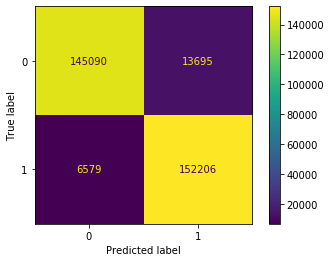

In [41]:
model = RandomForestClassifier(n_estimators=5)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(precision_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


C:\Users\mcssa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


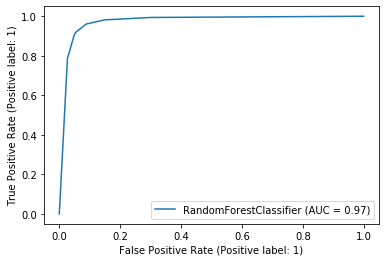

In [42]:
plot_roc_curve(model, X_test, y_test)
plt.show()

## Model persistance

In [43]:
from joblib import dump, load

In [44]:
# dump model
dump(model, 'model_risk.joblib') 

['model_risk.joblib']

### Load model & predict

In [45]:
my_model = load('model_risk.joblib') 

In [47]:
# example dict 'user_id' -> features
d = {
    '5008804': [32, 12, 2, 119.45, 1],
    '5008807': [29, 2, 1, 100, 0]
}

In [50]:
d['5008807']

[29, 2, 1, 100, 0]

In [52]:
my_model.predict([d['5008807']])

C:\Users\mcssa\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])